<img src='img/revival_hero_image-dan-meyers-unsplash.png'>

<small>Photo by Dan Meyers for Unsplash</small>

# Revival = Survival: A data project about the overdose crisis
by Shawn Syms
<br>
<br>

<a name="contents"></a>
## Contents

* <a href="#executive-summary">Executive summary</a>
* <a href='#data-visualization'>Module 1: Data visualization: Learning about the overdose crisis in Canada and Toronto</a>
* <a href='#predictive-model'>Module 2: Training a machine learning model to predict overdose outcomes</a>
* <a href='#services-locator'>Module 3: Creating a simple tool to point users to the locations of recovery resources</a>

> * <a href="#technical-configuration">Technical configuration</a>
> * <a href="#data-acquisition">Data acquisition</a>
> * <a href="#data-cleaning-and-eda">Data cleaning, exploratory data analysis (EDA) and preprocessing</a>
> * <a href="#user-experience">User experience</a>


<a name="executive-summary"></a>
## Executive summary

The purpose of this project is three-fold. First, I use data visualization tools and techniques to tell the story of the current state of the overdose epidemic nationally and locally. Second, I have trained a machine-learning model to try and predict overdose outcomes given relevant data. Third, I've built a simple tool based on multiple geo-spatial datasets where users can access resources to help stop overdoses, including pharmacies where they can access naloxone. Carrying it on their person, anyone can save a life.

<div style="text-align: right">(<a href="#contents">home</a>) </div>

<a name="data-visualization"></a>
## Module 1: Learning about the overdose crisis in Canada and Toronto through data visualization

An interactive version of these visualizations is available online at:

> <a href='https://public.tableau.com/profile/shawn.syms#!/vizhome/shared/2DNT56KHS'>Tableau Public: Shawn Syms</a>

<strong>SUMMARY:</strong> I review multiple datasets with national, province and local information to see what they reveal about the opioid-overdose crisis here at home. 

### Key Data Points
1. The opioid overdose crisis is a growing issue here in Canada. 

<img src='img/revival-data_visualization_1.png'>

<br><br>
2. Across Ontario, drugs with an astonishing toxicity are available.

<img src='img/revival-data_visualization_2.png'>

<br><br>
3. As Fentanyl enters the drug trade, more and more lives are lost.

<img src='img/revival-data_visualization_3.png'>

<br><br>
4. Deaths start to taper when Safer Injection Facilities arrive. 

<img src='img/revival-data_visualization_4.png'>

<br><br>
5. But there is more we can do to save lives, using Naloxone. 

<img src='img/revival-data_visualization_5.png'>

<div style="text-align: right">(<a href="#contents">home</a>) </div>

<a name="predictive-model"></a>
## Module 2: Building a machine-learning model to predict overdose deaths 

<strong>SUMMARY:</strong> Three slightly varying sets of data on Ontario opioid prescriptions, morbidity and mortality, and use of safer injecting sites are compared to see if an effective predictive model can be trained. Part of the challenge is the timeframes: we have morbidity and mortality data for 2003-2019, prescribing information only from 2013-2019 and safer-injection site visits from 2017 to 2020.

In [177]:
dataset_a = pd.read_csv('csv/predictive-model/Ontario/2003-2019/Dataset_A.csv')
dataset_b = pd.read_csv('csv/predictive-model/Ontario/2013-2019/Dataset_B.csv')

In [178]:
dataset_a.head()

Month  ED_visits_rate  ED_visits_count  Hospitalization_rate  \
0  Jan-03            12.7              129                   7.9   
1  Feb-03             9.8               99                   7.5   
2  Mar-03            15.7              160                   9.9   
3  Apr-03            14.9              152                   7.9   
4  May-03            15.7              160                  10.1   

   Hospitalization_count  Deaths_rate  Deaths_count  
0                     80          2.7            27  
1                     76          2.3            23  
2                    101          3.0            30  
3                     80          2.7            27  
4                    103          2.7            27

In [179]:
dataset_a.dtypes

Month                     object
ED_visits_rate           float64
ED_visits_count            int64
Hospitalization_rate     float64
Hospitalization_count      int64
Deaths_rate              float64
Deaths_count               int64
dtype: object

In [180]:
dataset_a['Month'] = pd.to_datetime(dataset_a['Month'],format='%b-%y')

In [181]:
dataset_a.head() 

Month  ED_visits_rate  ED_visits_count  Hospitalization_rate  \
0 2003-01-01            12.7              129                   7.9   
1 2003-02-01             9.8               99                   7.5   
2 2003-03-01            15.7              160                   9.9   
3 2003-04-01            14.9              152                   7.9   
4 2003-05-01            15.7              160                  10.1   

   Hospitalization_count  Deaths_rate  Deaths_count  
0                     80          2.7            27  
1                     76          2.3            23  
2                    101          3.0            30  
3                     80          2.7            27  
4                    103          2.7            27

In [182]:
dataset_b.dtypes

Year                          int64
ED_visits_rate              float64
ED_visits_count             float64
Hospitalization_rate        float64
Hospitalization_count         int64
Prescribing_MDs               int64
Naloxone_distributed          int64
OAT_prescribed                int64
cough_prescribed              int64
pain_prescribed_overall       int64
pain_prescribed_new           int64
all_prescribed                int64
codeine_prescribed            int64
codeine_combo_prescribed      int64
fentanyl_prescribed           int64
hydromorphone_prescribed      int64
morphine_prescribed           int64
other_opioid_prescribed       int64
oxycodone_prescribed          int64
oxy_combo_prescribed          int64
tramadol_prescribed           int64
SIS_visits                    int64
SIS_Ods                       int64
Deaths_rate                 float64
Deaths_count                float64
dtype: object

In [183]:
dataset_b['Year'] = pd.to_datetime(dataset_b['Year'],format='%Y')

In [184]:
dataset_b.head()


Year  ED_visits_rate  ED_visits_count  Hospitalization_rate  \
0 2013-01-01       22.516667           3051.0             12.325000   
1 2014-01-01       24.466667           3347.0             12.483333   
2 2015-01-01       26.291667           3628.0             12.641667   
3 2016-01-01       31.658333           4427.0             13.641667   
4 2017-01-01       54.575000           7764.0             15.083333   

   Hospitalization_count  Prescribing_MDs  Naloxone_distributed  \
0                   1671             1506                     0   
1                   1706             1741                     0   
2                   1746             1955                     0   
3                   1908             2302                  7066   
4                   2145             2978                 60523   

   OAT_prescribed  cough_prescribed  pain_prescribed_overall  ...  \
0           45781            310827                  1666964  ...   
1           49397            338896                  1675085  ...   
2           53457            317778                  1669991  ...   
3           57296            317174                  1650183  ...   
4           60758            316194                  1566731  ...   

   hydromorphone_prescribed  morphine_prescribed  other_opioid_prescribed  \
0                    198090               105056                    27431   
1                    229600               106912                    28064   
2                    259822               106945                    26190   
3                    282183               110938                    23522   
4                    290921               111510                    21618   

   oxycodone_prescribed  oxy_combo_prescribed  tramadol_prescribed  \
0                 74271                478989               162076   
1                 71645                483178               171313   
2                 72683                478912               180296   
3                 73681                453319               192253   
4                 70041                395592               192806   

   SIS_visits  SIS_Ods  Deaths_rate  Deaths_count  
0           0        0     4.733333         639.0  
1           0        0     4.941667         676.0  
2           0        0     5.283333         728.0  
3           0        0     6.183333         867.0  
4        1979       34     8.875000        1265.0  

[5 rows x 25 columns]

## Imports

In [210]:
%matplotlib notebook

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from scipy import stats

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


In [213]:
X_a = dataset_a.loc[:,'ED_visits_rate':'Deaths_rate']
X_b = dataset_b.loc[:,'ED_visits_rate':'Deaths_rate']
y_a = dataset_a['Deaths_count']
y_b = dataset_b['Deaths_count']
numeric_b = dataset_b.loc[:,'ED_visits_rate':'Deaths_count']

In [216]:
dataset_b

Year  ED_visits_rate  ED_visits_count  Hospitalization_rate  \
0 2013-01-01       22.516667       3051.00000             12.325000   
1 2014-01-01       24.466667       3347.00000             12.483333   
2 2015-01-01       26.291667       3628.00000             12.641667   
3 2016-01-01       31.658333       4427.00000             13.641667   
4 2017-01-01       54.575000       7764.00000             15.083333   
5 2018-01-01       63.408333       9154.00000             14.600000   
6 2019-01-01       76.533333      11170.66667             14.122222   

   Hospitalization_count  Prescribing_MDs  Naloxone_distributed  \
0                   1671             1506                     0   
1                   1706             1741                     0   
2                   1746             1955                     0   
3                   1908             2302                  7066   
4                   2145             2978                 60523   
5                   2108             3738                125606   
6                   2060             4536                206889   

   OAT_prescribed  cough_prescribed  pain_prescribed_overall  \
0           45781            310827                  1666964   
1           49397            338896                  1675085   
2           53457            317778                  1669991   
3           57296            317174                  1650183   
4           60758            316194                  1566731   
5           63033            301302                  1515295   
6           65817            267536                  1434506   

   pain_prescribed_new  all_prescribed  codeine_prescribed  \
0                    0         2087964               50055   
1              1022812         2091485               46316   
2              1012477         2082367               43809   
3               997570         2047809               42883   
4               938690         1925793               41844   
5               921954         1841906               41324   
6               877069         1728307               35060   

   codeine_combo_prescribed  fentanyl_prescribed  hydromorphone_prescribed  \
0                    957153                34843                    198090   
1                    921542                32915                    229600   
2                    884335                29375                    259822   
3                    844399                24631                    282183   
4                    783258                18203                    290921   
5                    742009                13429                    305863   
6                    683960                10746                    321749   

   morphine_prescribed  other_opioid_prescribed  oxycodone_prescribed  \
0               105056                    27431                 74271   
1               106912                    28064                 71645   
2               106945                    26190                 72683   
3               110938                    23522                 73681   
4               111510                    21618                 70041   
5               112545                    19761                 66452   
6               118727                    17178                 60690   

   oxy_combo_prescribed  tramadol_prescribed  SIS_visits  SIS_Ods  \
0                478989               162076           0        0   
1                483178               171313           0        0   
2                478912               180296           0        0   
3                453319               192253           0        0   
4                395592               192806        1979       34   
5                350144               190379       29122      530   
6                300248               179949       39787      634   

   Deaths_rate  Deaths_count  
0     4.733333    639.000000  
1     4.941667    676.000000  
2     5.283333    728.000000  
3    

In [212]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_b,
                                                    y_b,
                                                    test_size = 0.3,
                                                    random_state = 42)

ValueError: Unknown label type: 'continuous'

In [204]:
dataset_b.corr()

ED_visits_rate  ED_visits_count  \
ED_visits_rate                  1.000000         0.999932   
ED_visits_count                 0.999932         1.000000   
Hospitalization_rate            0.817049         0.811371   
Hospitalization_count           0.884175         0.879845   
Prescribing_MDs                 0.988104         0.989553   
Naloxone_distributed            0.963962         0.966673   
OAT_prescribed                  0.926538         0.926193   
cough_prescribed               -0.803339        -0.808044   
pain_prescribed_overall        -0.989643        -0.990879   
pain_prescribed_new             0.274637         0.274249   
all_prescribed                 -0.992739        -0.993906   
codeine_prescribed             -0.879295        -0.881745   
codeine_combo_prescribed       -0.973181        -0.973537   
fentanyl_prescribed            -0.973396        -0.972983   
hydromorphone_prescribed        0.869165         0.869276   
morphine_prescribed             0.930049         0.932352   
other_opioid_prescribed        -0.971345        -0.971882   
oxycodone_prescribed           -0.929825        -0.933094   
oxy_combo_prescribed           -0.993970        -0.994936   
tramadol_prescribed             0.491377         0.486879   
SIS_visits                      0.889922         0.894507   
SIS_Ods                         0.886706         0.890959   
Deaths_rate                     0.986603         0.985341   
Deaths_count                    0.987907         0.986803   

                          Hospitalization_rate  Hospitalization_count  \
ED_visits_rate                        0.817049               0.884175   
ED_visits_count                       0.811371               0.879845   
Hospitalization_rate                  1.000000               0.990425   
Hospitalization_count                 0.990425               1.000000   
Prescribing_MDs                       0.767823               0.847969   
Naloxone_distributed                  0.637742               0.732287   
OAT_prescribed                        0.873408               0.926803   
cough_prescribed                     -0.431341              -0.531937   
pain_prescribed_overall              -0.733859              -0.813923   
pain_prescribed_new                   0.392477               0.404967   
all_prescribed                       -0.748092              -0.827301   
codeine_prescribed                   -0.687678              -0.767946   
codeine_combo_prescribed             -0.839755              -0.905738   
fentanyl_prescribed                  -0.877224              -0.935013   
hydromorphone_prescribed              0.835736               0.888825   
morphine_prescribed                   0.727455               0.805280   
other_opioid_prescribed              -0.833441              -0.898603   
oxycodone_prescribed                 -0.565309              -0.666348   
oxy_combo_prescribed                 -0.768395              -0.844603   
tramadol_prescribed                   0.817264               0.791660   
SIS_visits                            0.500925               0.610768   
SIS_Ods                               0.516860               0.623489   
Deaths_rate                           0.881060               0.934326   
Deaths_count                          0.876316               0.931194   

                          Prescribing_MDs  Naloxone_distributed  \
ED_visits_rate                   0.988104              0.963962   
ED_visits_count                  0.989553              0.966673   
Hospitalization_rate             0.767823              0.637742   
Hospitalization_count            0.847969              0.732287   
Prescribing_MDs                  1.000000              0.973932   
Naloxone_distributed             0.973932              1.000000   
OAT_prescribed                   0.942551              0.843455   
cough_prescribed                -0.832061             -0.887821   
pain_prescribed_overall         -0.985478             -0.990142   
pain

In [188]:
lr_a = LinearRegression()
lr_b = LinearRegression()
lr_a.fit(X_a, y_a)
lr_b.fit(X_b, y_b)

LinearRegression()

In [207]:
pairplot = sns.pairplot(numeric_b)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


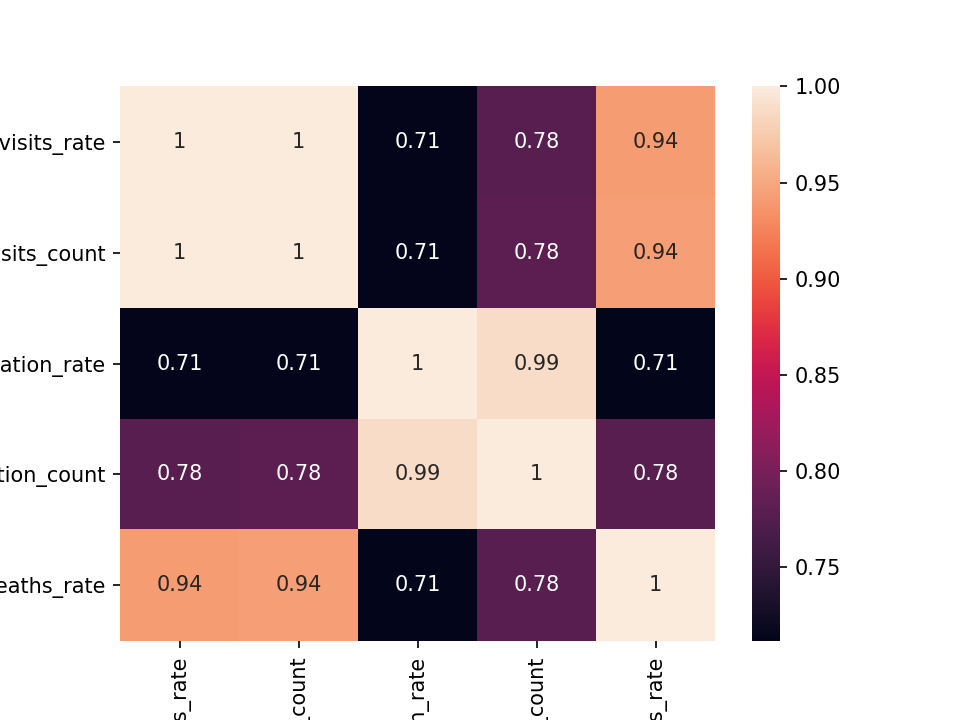

In [192]:
sns.heatmap(X_a.corr(), annot=True)

<a name="services-locator"></a>
## Module 3: Overdose resources locator

<strong>SUMMARY:</strong> I write a basic python script to validate a user's location and identify the nearest overdose-related resources, placing them on a map. These resources include: pharmacies where the opiate-antidote naloxone can be obtained, safer injection sites as well as medical clinics focused on addiction recovery. 

<a name="technical-configuration"></a>
## Technical configuration
### Environment set-up

This app was set up using anaconda and a virtual environment. To mimic it, run the commands below from a command prompt. If you don't have anaconda, you can use pip to achieve the same results.

In [217]:
## Anaconda virtual environment; run from a terminal window
#
# conda create --name shopify flask  numpy pandas requests 
#
# From inside the newly created environment:
# conda install -c conda-forge folium

### Imports
<a name="imports-and-functions"></a>

In [402]:
# The following packages should be imported in order for the application to work correctly.

import folium
import math
 
import requests
import time

from flask import Flask, render_template
from folium.plugins import MarkerCluster
from IPython.display import HTML

# %xmode Minimal
# %xmode Plain
# %xmode Context
# %xmode Verbose 


### Functions

In [403]:
'''Here is a list of all functions used by the application.
* by Shawn Syms, September 2020
'''

def geocode_ip():
    
    '''This function uses the GeoJS API to identify or approximate 
    * a user's location NOTE: This is based on IP address, which
    * reduces accuracy
    '''
    
    get_ip = requests.get('https://get.geojs.io/v1/ip.json') # request user's IP address
    ip_address = get_ip.json()['ip']                         # parse via json
    location_request = requests.get('https://get.geojs.io/v1/ip/geo/' + ip_address + '.json') 
    # request additional params
    location_parameters = location_request.json()            # parse via json 
    user_longitude = location_parameters['longitude']
    user_latitude = location_parameters['latitude']
    return (user_longitude, user_latitude)


def individual_postal_code_to_lat_long(postcode):
    
    ''' This function uses the GeoCoder.ca API to get a pair of 
    * lat/long coordinates by looking up the postal code
    
    * Geocoding by IP address is quite inaccurate, so I am considering
    * alternative approaches
    '''
    
    location_request = requests.get('https://geocoder.ca/?postal=' + postcode + '&geoit=XML&json=1')
    location_parameters = location_request.json()
    latitude = location_parameters['latt']
    longitude = location_parameters['longt']
    return latitude, longitude


def bulk_postal_code_to_lat_long(dataframe):
    
    '''This function using the geocoder.ca API to get longitude and
    * latitude values for a list of observations by supplying the 
    * postal code. Assumes that every observation includes a valid 
    * postal code
    
    * Note: In my testing I found the geocoder.ca lat long data
    * to be pretty inaccurate. I ended up using a service called "Geocoding
    * by Awesome Table, which uses the Google Maps API and Google Sheets.
    * Keeping this function here for posterity though."
    '''
    
    for i in range(len(dataframe)):  # for each observation
        # format a request in the manner that the Geocoder API expects
        location_request = requests.get('https://geocoder.ca/?postal=' + dataframe['Postcode'][i] + '&geoit=XML&json=1')
        location_parameters = location_request.json() # Get details in json format
        latitude = location_parameters['latt']
        longitude = location_parameters['longt']
        
        try:
            dataframe['latitude'][i] = latitude
            
        except:
            dataframe['latitude'][i] = np.nan
                    
        try:
            dataframe['longitude'][i] = longitude
            
        except:
            dataframe['longitude'][i] = np.nan
            
        time.sleep(5)


def distance(origin_lat, origin_long, dest_lat, dest_long):
    
    ''' The Haversine formula is a mathematical equation for finding the distance 
    * between two points on the globe given that it is spherical and not flat.
    * 
    * The original author of this implementation is WAYNE DYCK. I edited it 
    * to better suit my objectives.
    * 
    * NOTE: This is distance "as the crow flies" -- a next step
    * would be to if I can get use Google APIs to give distance 
    * by the shortest travel route.
    '''

    earths_radius = 6371 # km

    dlat = math.radians(dest_lat - origin_lat)
    dlon = math.radians(dest_long - origin_long)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(origin_lat)) \
        * math.cos(math.radians(dest_lat)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = earths_radius * c

    return d


def isolate_the_variable(pandas_series):
    
    '''This simple function takes a pandas series representing the contents 
    of a dataframe column, and isolates the first value. It strips out some 
    extraneous values that are part of the series.'''
    
    return pandas_series.tolist()[0]

def exploratory_data_analysis(df):
    
    '''This function outputs some basic EDA information
    about a pandas dataframe'''
    
    # set some variables for EDA outputs
    columns = df.dtypes
    described = df.describe()
    head = df.head()
    tail = df.tail()
    duplicates = df[df.duplicated()]

    
    # output the values
    
    print('Here is the columns data:')
    print(columns)
    print('')
    print('Here are the numeric components of your dataset, described:')
    print(described)
    print('')
    print('Here are the first five observations:')
    print(head)
    print('')
    print('Here are the final five observations:')
    print(tail)
    print('')
    print('Here are any duplicate observations:')
    print(duplicates)
    
def data_cleaning(df):
    
    '''This function applies some data hygiene to a
    given dataset. My original pharmacy dataset was quite messy and needed this.
    The replacement one, from the Ontario Pharmacists Association, is
    quite clean and didn't need it. Keeping for posterity.'''
    
    # change to Upper/lower case; use a list comprehension
    for columns in df.columns:
        df[columns] = df[columns].str.title() 

    # get rid of any pharmacies with identical addresses
    df.drop_duplicates(subset ="Address", keep = False, inplace = True)
    
    # establish proper formatting for postal code 
    # assumes the space is missing
    
    df['Postcode'] = [str(i[:3] + ' ' + i[3:]) for i in df['Postcode']]

def user_experience():
    
    '''This function takes the user name and what the user is looking for,
    * looks up the user's location and compares it to the appropriate
    * dataset of recovery resources by geographic distance, and returns
    * the resource closest to the user, on a map
    '''
    
    user_name = input('Welcome! May I please have your first name? ')

    user_choice = input('What do you want to do today: '
                        '(1) Get Naloxone to save a life, '
                        '(2) Access recovery resources,' 
                        '(3) Access safer-injection facilities? ')
    
    # Distinguish between three types of resources and set variables
    if user_choice == '1':
        df = pd.read_csv('csv/locator/official_toronto_pharmacy_roster.csv')
        locator_type = "pharmacy"
        print("")
        print("Naloxone is available at your nearest pharmacy.")
        print("")
    elif user_choice == '2':
        df = pd.read_csv('csv/locator/toronto-raam_clinic_locations.csv')
        locator_type = "Rapid Access to Addiction Medicine clinic"
        print("")
        print("If you or someone you know is serious about recovery,")
        print("physicians at a rapid-access-to-addiction-medicine (RAAM)")
        print("clinic and help you today.")
        print("")

    elif user_choice == '3':
        df = pd.read_csv('csv/locator/toronto-safe_site_locations.csv')
        locator_type = 'safer injection facility'
        print("")
        print("People who inject drugs should ideally never do so alone.")
        print("Visit the nearest safer injection site.")
        print("")
    
    # default to the pharmacy locator if the input is ambiguous
    
    else:
        df = pd.read_csv('csv/locator/official_toronto_pharmacy_roster.csv')
        locator_type = "pharmacy"
        print("")
        print("Naloxone is available at your nearest pharmacy.")
        print("")

    # identify user's location by IP
    # Replace this with HMTL 5 Geolocation in JS/Leaflet/Flask version

    user_location = geocode()
    user_latitude = user_location[1]
    user_longitude = user_location[0]
    user_coordinates=str(user_location[1] + ',' + user_location[0])

    # Set up a dataframe with their information

    user_details = {'Name': [user_name],
            'Address': ['Current User Location'],
            'City': ['Current city'],
            'Postcode': ["Current location postal code"],
            'Latitude': [user_latitude],
            'Longitude': [user_longitude],
            'Distance': 0}

    user_data = pd.DataFrame(user_details)
    df = df.append(user_data) # append it to the dataframe in memory
    df = df.astype({'Longitude' : 'float', 'Latitude' : 'float'})
    df.reset_index(drop=True, inplace=True)

    # Set some variables related to the user
    user_index = df[df['Name']==user_name].index.values
    user_observation = df.loc[user_index]
    user_latitude = user_observation['Latitude'].tolist()[0] 
    user_longitude = user_observation['Longitude'].tolist()[0]
    user_coordinates = user_latitude, user_longitude
    
    ''' Loop through the dataset calculating distance from user
    * for each one. This solution scales to the city pharmacist
    * dataset with ease, but a different approach would be needed to 
    * scale up to provincial or national data
    '''

    for i in (range(len(df))):
        df['Distance'][i] = distance(user_observation['Latitude'],
                                  user_observation['Longitude'], 
                                  df['Latitude'][i],
                                  df['Longitude'][i])
    df.sort_values(by=['Distance'], inplace=True)
    df.reset_index(drop=True, inplace=True)
    
    # Identify the closest location
    closest_location = df.loc[1]
    closest_location_coordinates = closest_location['Latitude'], closest_location['Longitude']

    # Return the results
    print(user_name + ', your closest ' + locator_type + ' is ' + closest_location['Name'] + ', located at ' + closest_location['Address'] + '.')
    print('Here is a map showing your nearest ' + locator_type + ", " + user_name + '.')

    #Create the map
    locator_map = folium.Map(location = user_coordinates, zoom_start = 13)

    folium.Marker(user_coordinates, popup = 'You are here').add_to(locator_map)
    folium.Marker(closest_location_coordinates, popup = closest_location['Name']).add_to(locator_map)

    #Display the map
    return(locator_map)
        


<div style="text-align: right">(<a href="#contents">home</a>) </div>

<a name="data-acquisition"></a>
### Data acquisition

This app includes code that will do a geo-spatial lookup of support resources for people who want to help prevent drug overdoses. See the readme file for source locations for all relevant datasets. Copies of the datasets can be found in this Github repository in the csv directory. (Note: All of the datasets used in the data visualizations above can be found in that directory as well.) First, the datasets are explored and cleaned.

<div style="text-align: right">(<a href="#contents">home</a>) </div>

<a name="data-cleaning-and-eda"></a>
## Data cleaning, exploratory data analysis and preprocessing

### Pharmacies

Pharmacies across the province and around Ontario dispense Naloxone kits and offer training on their use. Let's have a look at our Toronto pharmacies dataset.

In [225]:
pharmacies = pd.read_csv('csv/locator/official_toronto_pharmacy_roster.csv')

exploratory_data_analysis(pharmacies)

Here is the columns data:
Name          object
Address       object
Phone         object
City          object
Postcode      object
Latitude     float64
Longitude    float64
Distance       int64
dtype: object

Here are the numeric components of your dataset, described:
         Latitude   Longitude  Distance
count  543.000000  543.000000     543.0
mean    43.683824  -79.398612       0.0
std      0.038630    0.066840       0.0
min     43.589969  -79.603678       0.0
25%     43.656498  -79.438192       0.0
50%     43.671491  -79.393801       0.0
75%     43.703384  -79.365980       0.0
max     43.835605  -79.185016       0.0

Here are the first five observations:
                      Name                Address           Phone     City  \
0       1ClinicRx Pharmacy            16 Yonge St  (647) 344-8800  Toronto   
1              99 Pharmacy       436 Dundas St. W  (416) 977-8338  Toronto   
2          Action Pharmacy        2425 Bloor St W  (416) 766-2401  Toronto   
3    Albion Finch Ph

<div style="text-align: right">(<a href="#contents">home</a>) </div>

### Toronto safer-injection sites

Safer-injection sites offer supervision in order to mitigate overdose risk. An app user may need this information for themselves or someone they know. Let's have a look at our Toronto dataset of safer-injection sites.

In [226]:
safe_sites = pd.read_csv('csv/locator/toronto-safe_site_locations.csv')

exploratory_data_analysis(safe_sites)

Here is the columns data:
Name          object
Address       object
City          object
Province      object
Postcode      object
Latitude     float64
Longitude    float64
Distance     float64
dtype: object

Here are the numeric components of your dataset, described:
        Latitude  Longitude  Distance
count   9.000000   9.000000       9.0
mean   43.654267 -79.381488       0.0
std     0.006294   0.026656       0.0
min    43.641824 -79.429466       0.0
25%    43.653650 -79.403172       0.0
50%    43.656426 -79.372785       0.0
75%    43.658689 -79.369567       0.0
max    43.661143 -79.339202       0.0

Here are the first five observations:
                                                Name                 Address  \
0               Fred Victor Overdose Prevention Site   145 Queen Street East   
1                 Moss Park Overdose Prevention Site   134 Sherbourne Street   
2  Parkdale Queen West Community Health Centre Ov...     168 Bathurst Street   
3                  Parkdale Ov

In [227]:
safe_sites

Name                 Address  \
0               Fred Victor Overdose Prevention Site   145 Queen Street East   
1                 Moss Park Overdose Prevention Site   134 Sherbourne Street   
2  Parkdale Queen West Community Health Centre Ov...     168 Bathurst Street   
3                  Parkdale Overdose Prevention Site  1229 Queen Street West   
4               Regent Park Overdose Prevention Site  465 Dundas Street East   
5            South Riverdale Community Health Centre   955 Queen Street East   
6                      St. Stephen's Community House      260 Augusta Avenue   
7                                      Street Health  338 Dundas Street East   
8                                          The Works     277 Victoria Street   

      City Province Postcode   Latitude  Longitude  Distance  
0  Toronto  Ontario  M5A 1S1  43.653650 -79.372785       0.0  
1  Toronto  Ontario  M5A 4J4  43.654171 -79.369567       0.0  
2  Toronto  Ontario  M5V 2R4  43.646589 -79.404227       0.0  
3  Toronto  Ontario  M6K 1L2  43.641824 -79.429466       0.0  
4  Toronto  Ontario  M5A 2B2  43.659376 -79.365585       0.0  
5  Toronto  Ontario  M4M 3P3  43.661143 -79.339202       0.0  
6  Toronto  Ontario  M5T 2L9  43.656426 -79.403172       0.0  
7  Toronto  Ontario  M5A 2A1  43.658689 -79.370007       0.0  
8  Toronto  Ontario  M5B 1W2  43.656536 -79.379377       0.0

<div style="text-align: right">(<a href="#contents">home</a>) </div>

### Toronto RAAM clinics

A Rapid Access to Addictive Medicine (RAAM) clinic offers medical treatment for problem substance use. An app user may need this information for themselves or someone they know. Let's have a look at our Toronto dataset of RAAM clinics.

In [228]:
raam_clinics = pd.read_csv('csv/locator/toronto-raam_clinic_locations.csv')

exploratory_data_analysis(raam_clinics)

Here is the columns data:
Name          object
Address       object
Phone         object
City          object
Province      object
Postcode      object
Latitude     float64
Longitude    float64
Distance       int64
dtype: object

Here are the numeric components of your dataset, described:
        Latitude  Longitude  Distance
count   9.000000   9.000000       9.0
mean   43.675460 -79.396372       0.0
std     0.030269   0.047768       0.0
min    43.640394 -79.488756       0.0
25%    43.653735 -79.405942       0.0
50%    43.664728 -79.385876       0.0
75%    43.689871 -79.374172       0.0
max    43.723780 -79.324858       0.0

Here are the first five observations:
                       Name                           Address  \
0      Unity Health Toronto        30 Bond Street, 17th floor   
1     Humber River Hospital     1235 Wilson Avenue, 5th floor   
2  Women's College Hospital    76 Grenville Street, 3rd floor   
3      Unity Health Toronto  410 Sherbourne Street, 1st floor   
4   

In [229]:
raam_clinics

Name                           Address  \
0               Unity Health Toronto        30 Bond Street, 17th floor   
1              Humber River Hospital     1235 Wilson Avenue, 5th floor   
2           Women's College Hospital    76 Grenville Street, 3rd floor   
3               Unity Health Toronto  410 Sherbourne Street, 1st floor   
4               Unity Health Toronto    30 The Queensway, Ground floor   
5          University Health Network   399 Bathurst Street, 1st floor,   
6            Michael Garron Hospital                825 Coxwell Avenue   
7  Sunnybrook Health Sciences Centre    2075 Bayview Avenue, Room A146   
8          Anishnawbe Health Toronto  4 Charles Street East, 3rd floor   

                Phone     City Province Postcode   Latitude  Longitude  \
0  416-864-6060 x2567  Toronto  Ontario  M5B 1X1  43.653735 -79.377398   
1      1-888-399-8342  Toronto  Ontario  M3M 3G7  43.723780 -79.488756   
2     416-323-7559 x6  Toronto  Ontario  M5S 1B2  43.661514 -79.387121   
3        416-864-3096  Toronto  Ontario  M4X 1K2  43.664728 -79.374172   
4  416-530-6486 x3969  Toronto  Ontario  M6R 1B5  43.640394 -79.450347   
5        416-726-5052  Toronto  Ontario  M5T 2S8  43.653386 -79.405942   
6        416-461-8272  Toronto  Ontario  M4C 3E7  43.689871 -79.324858   
7        416-480-6736  Toronto  Ontario  M4N 3M5  43.722846 -79.372875   
8   416-657-0379 x234  Toronto  Ontario  M4Y 1T2  43.668886 -79.385876   

   Distance  
0         0  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         0  
8         0

<div style="text-align: right">(<a href="#contents">home</a>) </div>

### Get geocoding data for our datasets

In [36]:
'''One option is to Iterate through the list and query for the longitude and latitude 
using the Geocoder API. Unhash the code below (and the subsequent cell) 
if you wish to run the process to gather the latitude and longitude coordinates. 

NOTE: I found the Geocoder API to not be very accurate. See the note in the function
for more details. The saved csv files have the longitude and latitude built into them
already'''

# bulk_postal_code_to_lat_long(pharmacies_to_process)

''' Save the transformed data
pharmacies_to_process.to_csv('csv/toronto_pharmacies_saved.csv', index = False)'''

In [37]:
''' Save the transformed data
pharmacies_to_process.to_csv('csv/toronto_pharmacies_saved.csv', index = False)'''

<div style="text-align: right">(<a href="#contents">home</a>) </div>

<a name="user-experience"></a>
## User experience

In [401]:
user_experience()

Welcome! May I please have your first name? shawn
What do you want to do today: (1) Get Naloxone to save a life, (2) Access recovery resources,(3) Access safer-injection facilities? 2

If you or someone you know is serious about recovery,
physicians at a rapid-access-to-addiction-medicine (RAAM)
clinic and help you today.

shawn, your closest Rapid Access to Addiction Medicine clinic is University Health Network, located at 399 Bathurst Street, 1st floor,.
Here is a map showing your nearest Rapid Access to Addiction Medicine clinic, shawn.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<div style="text-align: right">(<a href="#contents">home</a>) </div>